In [5]:
from environment import Environment
import matplotlib.pyplot as plt
import math
import numpy as np
from game import ShoeGame, SymmetricVotingGame, NonSymmetricVotingGame, AirportGame, SumUnanimityGames, UnanimityGame, GlobalFeatureImportance, LocalFeatureImportance
from plot import plot

In [6]:
from algorithms.halfbus import HalfBUS, SIRHalfBUS
from algorithms.ApproShapley import ApproShapley
from algorithms.BUS import BUS
from algorithms.HybridApproBUS import HybridApproBUS, SmartHybridApproBUS
from algorithms.SVARM import SVARM, StratSVARM, TruncStratSvarm, BasicStratSVARM
from algorithms.TMAB import TMAB
from algorithms.ISSV import ISSV
from algorithms.ShapleySort import ShapleySort

In [7]:
n=13
k=5
budget=1000
rounds=600
step_interval=100
metric = "ratio"
env = Environment(n=n, budget=budget, metric=metric)
results = []

In [8]:
filepath = "datasets/Global feature importance/Wine classification random forest.csv"
game = GlobalFeatureImportance(filepath=filepath, num_players=n, use_cached=True)
# game = SumUnanimityGames()

could not find cached values. manual reindexing...
1000
2000
3000
4000
5000
6000
7000
8000
could not find cached shapley values. manual calculation...
[0.         0.2037037  0.22222222 ... 0.59259259 0.59259259 0.57407407]
[0.06563616 0.04330171 0.01154566 0.02576724 0.03061332 0.0358315
 0.07962927 0.01549854 0.00562601 0.07859645 0.05043521 0.04554771
 0.08604528] 0.5740740740740702


In [9]:
# results += [("SIRHalfBUS", env.evaluate(game, SIRHalfBUS(), k, step_interval, rounds))]

In [10]:
results += [("ShapleySort", env.evaluate(game, ShapleySort(), k, step_interval, rounds))]


In [11]:
results += [("StratSVARM start exact", env.evaluate(game, StratSVARM(start_exact=True), k, step_interval, rounds))]

In [12]:
results += [("HalfBUS", env.evaluate(game, HalfBUS(focus=n), k, step_interval, rounds))]

In [13]:
results += [("ApproShapley", env.evaluate(game, ApproShapley(optimize=True), k, step_interval, rounds))]

In [14]:
plot(results, step_interval=step_interval, types=["topk", "mse"], metric=metric, save=True, filepath=f"results/{game.__class__.__name__}({filepath.split('/')[-1]})_n={n}_k={k}_T={budget}_r={rounds}_{metric}.pdf")

In [15]:
np.isin([[1,2,3],[3,4,5]], [2,3]).sum(axis=1)

array([2, 1])

In [16]:
pre_samples = 10

In [17]:
lengths = np.random.randint(n+1, size=(pre_samples))
lengths

array([ 4, 11, 13, 10,  2,  4,  3,  6,  1,  6])

In [18]:
np.mgrid[0:4, 0:4][1]

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [19]:
import pandas as pd

In [20]:
dataset = "datasets/Global feature importance/German credit classification random forest.csv"

In [21]:
df = pd.read_csv(dataset)
df.tail()

,coalition,value
1048571,0|1|2|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.080000
1048572,0|1|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.043333
1048573,0|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.056667
1048574,1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.040000
1048575,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.060000


In [22]:
def index_to_coalition(index):
    view = np.array([index]).view(np.uint8)
    return np.where(np.unpackbits(view, bitorder='little'))[0]

def coalition_to_index(coalition):
    return np.sum(1 << coalition)

In [23]:
def binom(n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [24]:
num_sets_per_length = np.array([binom(n, l) for l in range(n+1)])
min_index_per_length = [np.sum(num_sets_per_length[:l]) for l in range(n+1)]
min_index_per_length

[0.0,
 1.0,
 14.0,
 92.0,
 378.0,
 1093.0,
 2380.0,
 4096.0,
 5812.0,
 7099.0,
 7814.0,
 8100.0,
 8178.0,
 8191.0]

In [25]:

values = np.zeros((2**n))
for i in range(2**n):
    coalition = index_to_coalition(i)
    name = f"s{''.join(coalition.astype('str'))}"
    rows = df[df["set"] == name]
    if rows.shape[0] > 1:
        rows = rows[rows.index >= min_index_per_length[coalition.shape[0]]]
        rows = rows[rows.index < min_index_per_length[coalition.shape[0]+1]]
    if rows.shape[0] > 1:
        print(rows)

KeyError: 'set'

In [15]:
# for index, row in df.iterrows():
#     if index == 0:
#         continue
#     print(np.array(row["coalition"].split('|'), dtype=int))
#     if index > 55:
#         break

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[0 1]
[0 2]
[0 3]
[0 4]
[0 5]
[0 6]
[0 7]
[0 8]
[0 9]
[ 0 10]
[ 0 11]
[ 0 12]
[ 0 13]
[ 0 14]
[ 0 15]
[ 0 16]
[ 0 17]
[ 0 18]
[ 0 19]
[1 2]
[1 3]
[1 4]
[1 5]
[1 6]
[1 7]
[1 8]
[1 9]
[ 1 10]
[ 1 11]
[ 1 12]
[ 1 13]
[ 1 14]
[ 1 15]
[ 1 16]
[ 1 17]
[ 1 18]


In [16]:
def pdf(x, mu, variance):
    return  np.exp((-(x-mu)**2)/(2*variance)) / np.sqrt(2*math.pi*variance)

<BarContainer object of 100 artists>

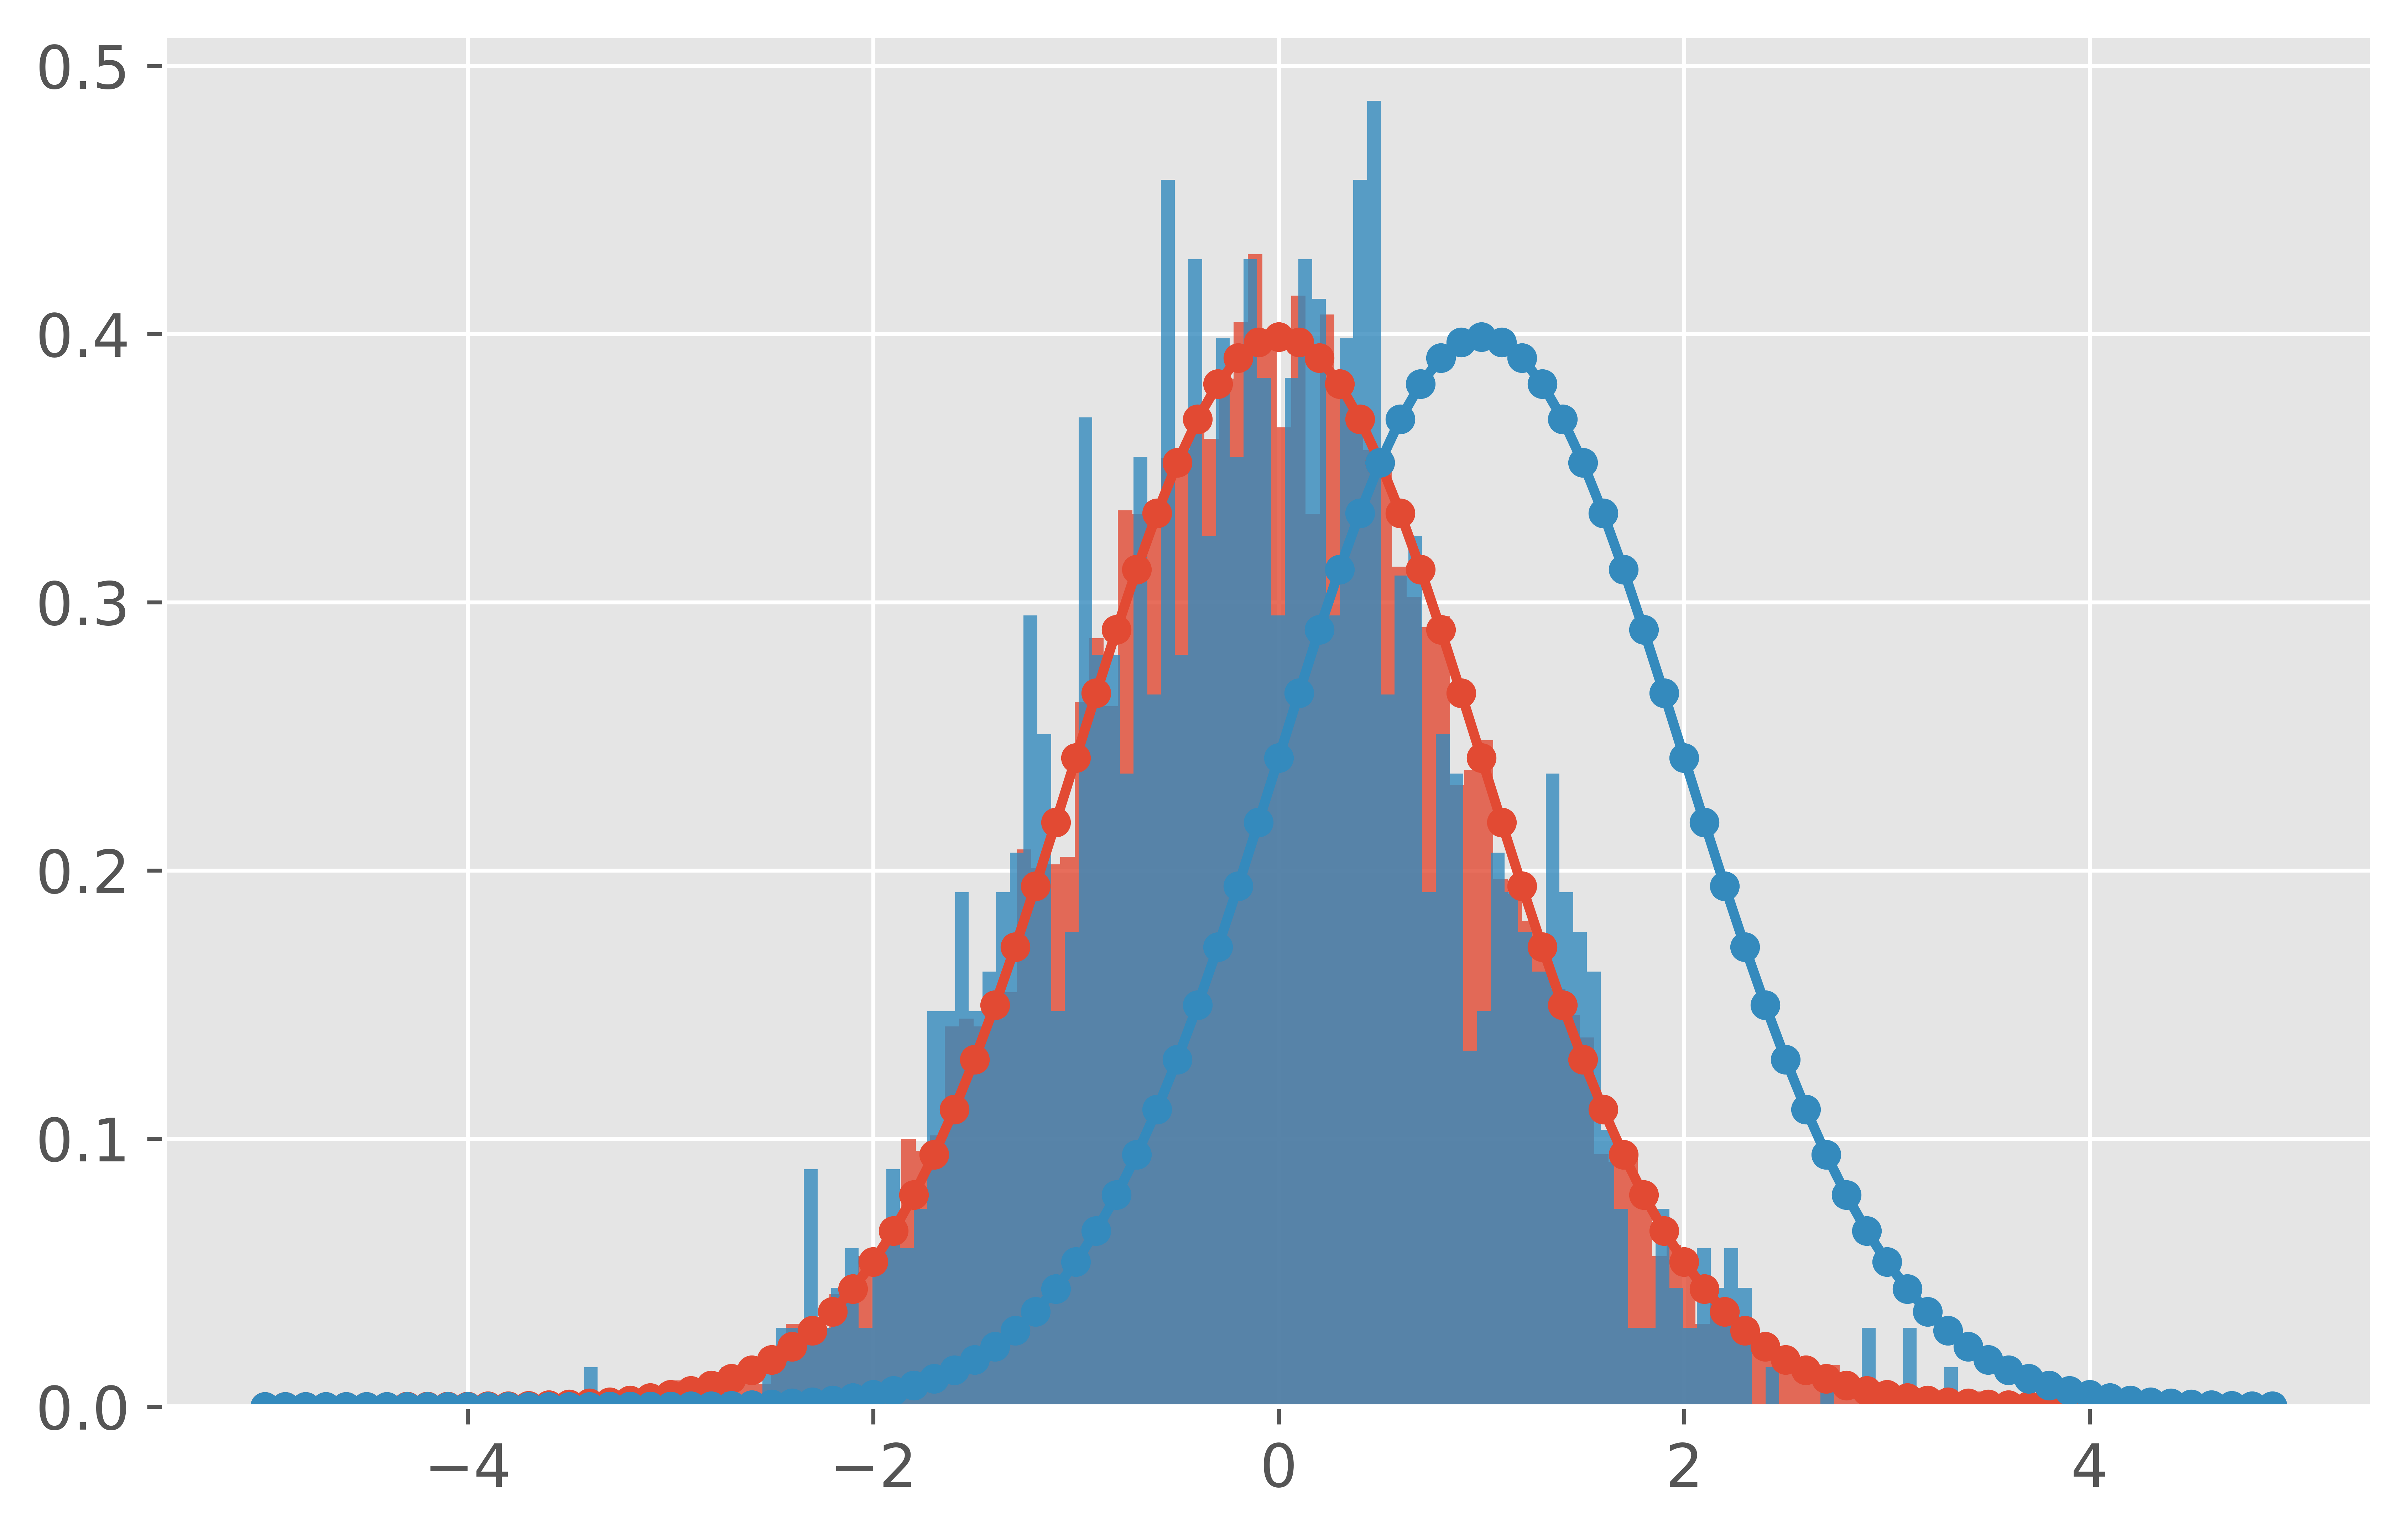

In [17]:
plt.style.use(plt.style.library['ggplot'])
plt.rcParams.update({'font.size': 12})
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.markersize'] = 10
fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
x = np.arange(100)/10 - 5
target_mu = 3
target_sigma = 1
values1 = pdf(x, 0, 1)
values2 = pdf(x, 1, 1)
samples = np.random.normal(0, 1, (10000))
weights = pdf(samples, 0, 1) / pdf(samples, 0, 1)
sum_weights = np.sum(weights)
new_samples = np.zeros((1000))
for j in range(1000):
    totalweight = 0
    # for i, sample in enumerate(samples):
    #     totalweight += weights[i]
    #     if np.random.rand() < weights[i]/totalweight:
    #         new_samples[j] = sample
    new_samples[j] = np.random.choice(samples, p=weights/sum_weights)

def histo(samples):
    num, edges = np.histogram(samples, bins=100)
    x = edges[:-1]
    width = edges[1:]-edges[:-1]
    area = np.sum(num * width)
    densities = num/area
    return x, densities, width 
ax.plot(x, values1, ".-", linewidth=2.0)
ax.plot(x, values2, ".-", linewidth=2.0)
preX, preDensity, preWidth  = histo(samples)
newX, newDensity, newWidth  = histo(new_samples)
ax.bar(preX, preDensity, preWidth, alpha=0.8)
ax.bar(newX, newDensity, newWidth, alpha=0.8)
# ax.plot(np.sort(samples), pdf(np.sort(samples), 1, 1), ".-", linewidth=2.0)